# DSCI6003 KMeans Lab

In this lab you are going to:
    1. Implement KMeans using SKlearn
    2. Tune the algorithm to find the best parameters

For this dataset, we are not going to tell you what the optimal number of clusters are. You will have to figure that out using the within class sum of squares and silhouette coefficient. 

### Part 1: Graphing

1. Load the data from the kmeans_data.txt. 

2. Plot the dataset. Can you see any distinct clusters? 

2. Run KMeans on it using 3 centroids. 

3. Plot the three centroids (These will be the mean of your clusters). What do you notice? Do the centroids seem intuitive? 

### Part 2: Calculating

1. Calculate the intra-cluster sums of squares. The beginning of the function is given to you below. The output should be a plot of the within cluster sum of squares for a given number of clusters. The formula is:

$$ \displaystyle W_k = \sum_{k=1}^K \sum_{\mathrm{x}_i \in C_k} ||\mathrm{x}_i - \mu_k ||^2 $$

2. Now you can calculate the Silhouette Coefficient. <a href = http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient>Use the sklearn implementation which can be found here</a>.

3. From these graphs what seems to be the optimal coefficients? 

4. Another thing you can do is plot the original dataset at an alpha = 0.1. What do you notice about the graph? From your intuition, how many clusters do you think there should be? 

5. Plot the clusters generated from KMeans using the optimal number of clusters you found.

### Part 3: Do it again

Now run all these steps on the kmeans_data_spread.txt. What do you notice about this dataset? How does it compare to the other one? Compare and contrast the graphs for the silhouette coefficient and within cluster sum of squares. 

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
from sklearn.cluster import KMeans
from collections import defaultdict
from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_score

Populating the interactive namespace from numpy and matplotlib


### Part One

In [3]:
kmeans_data_df = pd.read_table('kmeans_data.txt',header=None)

In [4]:
kmeans_data_df.head()

,0,1
0,624474,837604
1,673412,735362
2,647442,677000
3,532283,741384
4,646529,742844


In [5]:
kmeans_data_df.describe()

,0,1
count,5000.000000,5000.000000
mean,502998.059000,497112.739400
std,166636.782111,173555.371708
min,89604.000000,9597.000000
25%,370418.750000,362698.500000
50%,509385.500000,494896.000000
75%,637848.000000,631829.000000
max,932954.000000,977215.000000


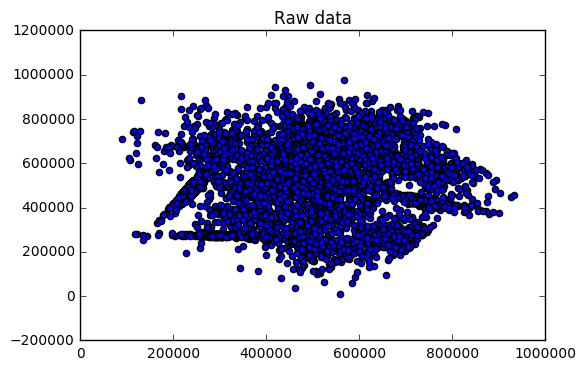

In [6]:
plt.scatter(kmeans_data_df.iloc[:,0],kmeans_data_df.iloc[:,1])
plt.title('Raw data');

- There appears to be three centeres to this data set.

Run KMeans on it using 3 centroids.

In [7]:
kmeans_model = KMeans(n_clusters=3).fit(kmeans_data_df)
predictions = kmeans_model.predict(kmeans_data_df)

In [8]:
cluster_centers = kmeans_model.cluster_centers_
cluster_centers

array([[ 316365.16394435,  445534.2353297 ],
       [ 620500.94258374,  341840.66438824],
       [ 575502.01698514,  662941.992569  ]])

In [9]:
predictions = kmeans_model.predict(kmeans_data_df)

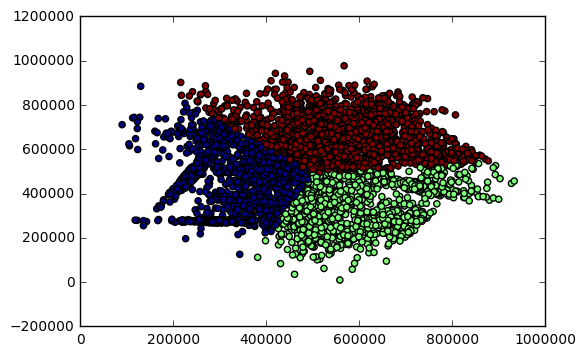

In [10]:
plt.scatter(kmeans_data_df.iloc[:,0],kmeans_data_df.iloc[:,1],c=predictions)

Plot the three centroids (These will be the mean of your clusters). What do you notice? Do the centroids seem intuitive?

In [170]:
def plot_centroids(data,clusters,labels=None):
    '''
    Input:
        data - (DataFrame) Data to cluster on
        labels - (list) List containing the labels for each datapoint
    Output:
        Plot showing the original datapoints and cluster centers found by KMeans
    '''
    
    kmeans_model = KMeans(n_clusters=clusters).fit(data)
    cluster_centers = kmeans_model.cluster_centers_
    predictions = kmeans_model.predict(data)
    plt.figure()
    for center in cluster_centers:
        plt.plot(center[0],center[1],marker='x',markersize=10,linewidth=15.0,color='white')
    plt.scatter(data.iloc[:,0],data.iloc[:,1],c=predictions)
    
    

        


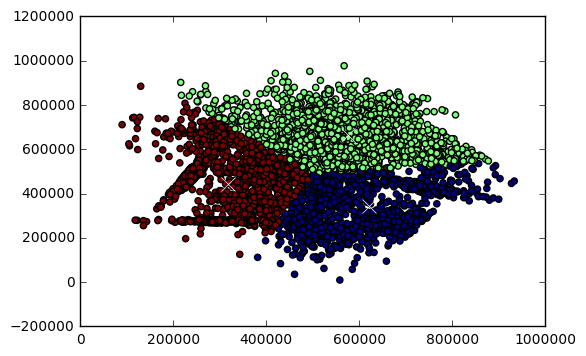

In [110]:
plot_centroids(kmeans_data_df,3)

In [171]:
def plot_Wk(data,clusters=3):
    '''
    Input:
        data - (DataFrame) Data to cluster on
        clusters - (list) List containing the number of clusters to check for
    Output:
        Plot showing the within cluster sum of squares
    '''
    data = np.array(data)
    kmeans_model = KMeans(n_clusters=clusters).fit(data)
    cluster_centers = kmeans_model.cluster_centers_
    
    predictions = kmeans_model.predict(data)
    within_cluster_sum_squares=defaultdict(int)

    for i in np.unique(predictions):
        indicies = np.where(predictions==i)
        points = data[indicies]
        for p in range(len(points)):
            within_cluster_sum_squares[i]+=euclidean(points[p],cluster_centers[i])
    final_sse = 0
    for k,v in within_cluster_sum_squares.items():
        final_sse+=v
    

    return final_sse

In [79]:
kmeans_data_df.iloc[0,:]

0    624474
1    837604
Name: 0, dtype: int64

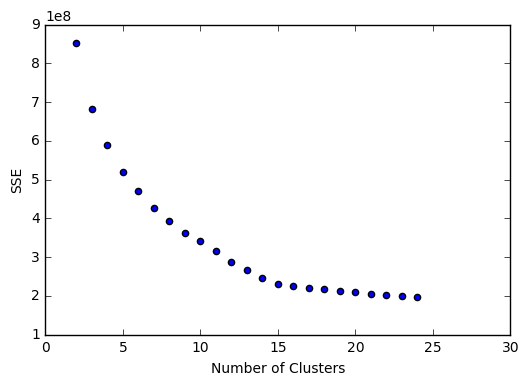

In [148]:
plt.scatter(range(2,25),[plot_Wk(kmeans_data_df,clusters=i) for i in range(2,25)])
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

Now you can calculate the Silhouette Coefficient. Use the sklearn implementation which can be found here.
From these graphs what seems to be the optimal coefficients?

In [176]:
def plot_silhouette(data,clusters):
    '''
    Input:
        data - (DataFrame) Data to cluster on
        clusters - (list) List containing the number of clusters to check for
    Output:
        Plot showing the silhouette score for different numbers of centroids
    '''
    data = np.array(data)
    kmeans_model = KMeans(n_clusters=clusters).fit(data)
    cluster_centers = kmeans_model.cluster_centers_
    
    predictions = kmeans_model.predict(data)
    
    return silhouette_score(data,predictions)
            

    
    

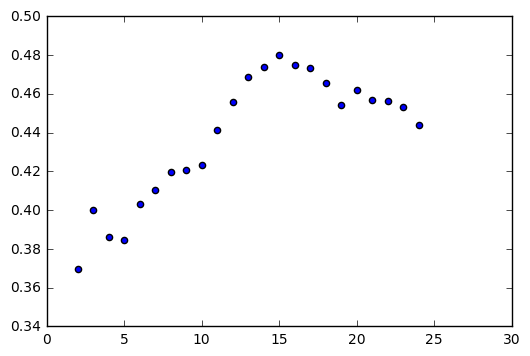

In [89]:
plt.scatter(range(2,25),[plot_silhouette(kmeans_data_df,i) for i in range(2,25)])

- The optimal coefficients here appear to be 15

Another thing you can do is plot the original dataset at an alpha = 0.1. What do you notice about the graph? From your intuition, how many clusters do you think there should be?

Plot the clusters generated from KMeans using the optimal number of clusters you found.

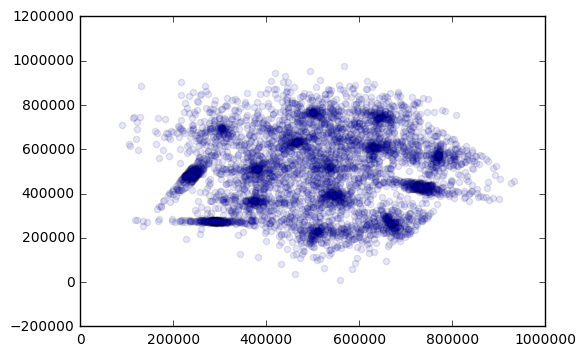

In [100]:
plt.scatter(kmeans_data_df.iloc[:,0],kmeans_data_df.iloc[:,1],alpha=.1);

- Using an alpha of .05, we can see that there are aproximately 15 clusters above. I think there there should be this number in clusters for this data.

In [107]:
kmeans_model = KMeans(n_clusters=15).fit(kmeans_data_df)
predictions = kmeans_model.predict(kmeans_data_df)
centroids = kmeans_model.cluster_centers_

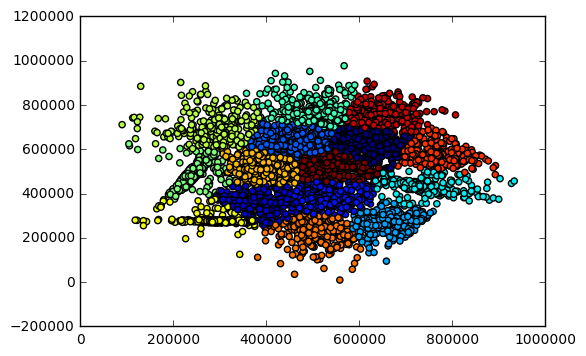

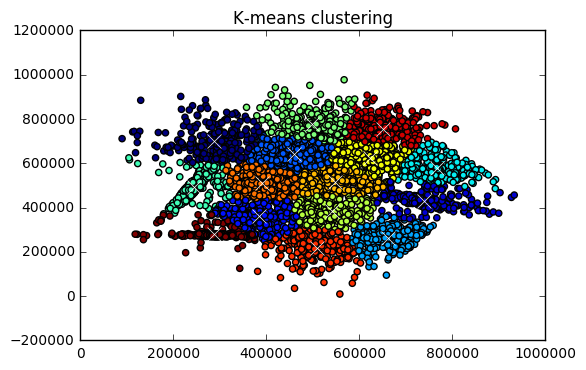

In [111]:

plt.scatter(kmeans_data_df.iloc[:,0],kmeans_data_df.iloc[:,1],c=predictions)
plot_centroids(kmeans_data_df,15)

plt.title('K-means clustering');

# Part 3: Do it again¶

Now run all these steps on the kmeans_data_spread.txt. What do you notice about this dataset? How does it compare to the other one? Compare and contrast the graphs for the silhouette coefficient and within cluster sum of squares.

In [155]:
kmeans_dataspread_df = pd.read_table('kmeans_data_spread.txt',header=None)

In [156]:
kmeans_dataspread_df.head()


,0,1
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


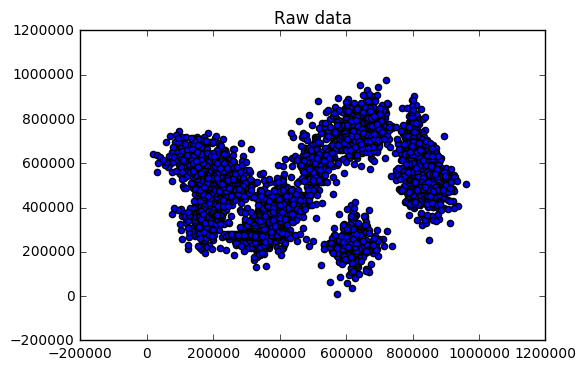

In [157]:
plt.scatter(kmeans_dataspread_df.iloc[:,0],kmeans_data_df.iloc[:,1])
plt.title('Raw data');

In [158]:
kmeans_modelspread = KMeans(n_clusters=3).fit(kmeans_dataspread_df)
predictionsspread = kmeans_modelspread.predict(kmeans_dataspread_df)

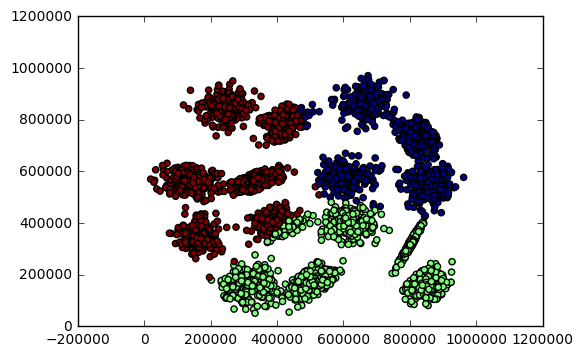

In [160]:
plt.scatter(kmeans_dataspread_df.iloc[:,0],kmeans_dataspread_df.iloc[:,1],c=predictionsspread)

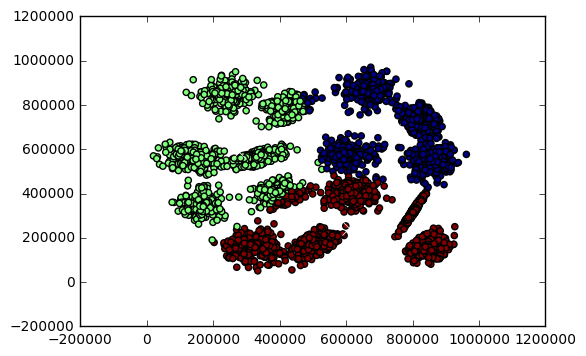

In [172]:
plot_centroids(kmeans_dataspread_df,3)

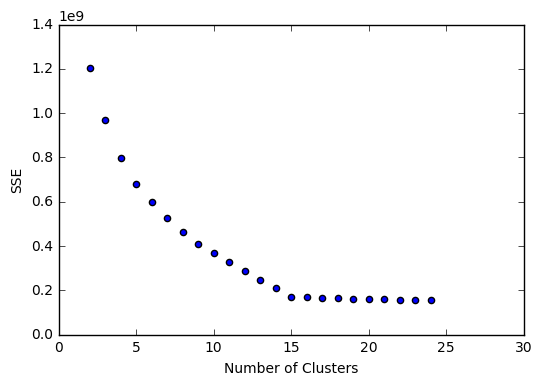

In [173]:
plt.scatter(range(2,25),[plot_Wk(kmeans_dataspread_df,clusters=i) for i in range(2,25)])
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

- There is much lower SSE here compared to the previous model with closer clusters.
- In addition, the optimal number of clusters appears to be the same at 15

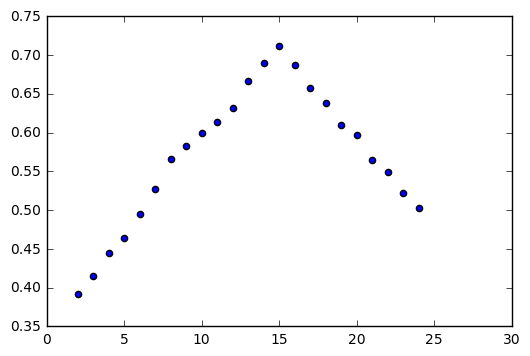

In [177]:
plt.scatter(range(2,25),[plot_silhouette(kmeans_dataspread_df,i) for i in range(2,25)])

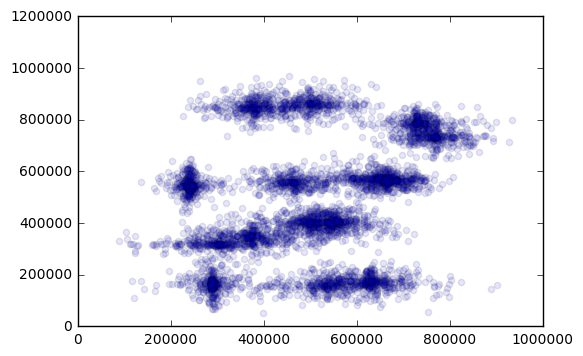

In [175]:
plt.scatter(kmeans_data_df.iloc[:,0],kmeans_dataspread_df.iloc[:,1],alpha=.1);

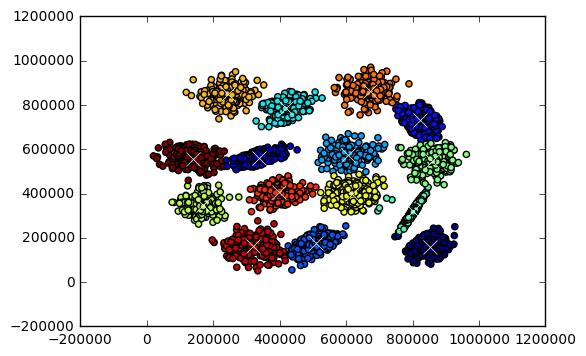

In [178]:
kmeans_modelspread = KMeans(n_clusters=15).fit(kmeans_dataspread_df)
predictionsspread = kmeans_modelspread.predict(kmeans_dataspread_df)
plot_centroids(kmeans_dataspread_df,15)

Compare and contrast the graphs for the silhouette coefficient and within cluster sum of squares.

 - The silhouette graph has a more definite peak for the ideal number of parameters. Also, the SSE is much smaller for theis clustering.